In [1]:
#loaded the required libraries.
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
#adding extra hidden layer
hidden_layer = Dense(encoding_dim, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
#Loading the fashion_mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255. #train data
x_test = x_test.astype('float32') / 255. #test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #reshaping the train data
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) #reshaping the test data

In [5]:
#fitting the data to autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6920 - val_loss: 0.6919


In [6]:
#predictions
decoded_img = autoencoder.predict(x_test)

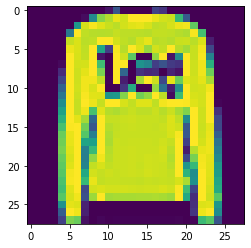

In [7]:
# Plotting x_test[i] image 
plt.imshow(x_test[1].reshape(28,28))
plt.show()

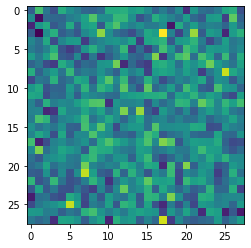

In [8]:
# Plotting decoded image of x_test[i]
plt.imshow(decoded_img[1].reshape(28,28))
plt.show()

## Changed the optimiser from adadelta to adam since by using adam we are able to decode the image because adam is an extension of adadelta. ADAM perform both rescaling and smoothing the gradients based on the respective(first order or second order information)

In [9]:
# this is our input placeholder
input_img = Input(shape=(784,))
#adding extra hidden layer
hidden_layer = Dense(128, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
#added callback
clbk = keras.callbacks.TensorBoard(log_dir='./last1', histogram_freq=20,write_graph=True, write_images=True)
#fitting the data to autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.0074 - val_loss: 0.3245 - val_accuracy: 0.0118
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3118 - accuracy: 0.0122 - val_loss: 0.3062 - val_accuracy: 0.0131
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3007 - accuracy: 0.0121 - val_loss: 0.2998 - val_accuracy: 0.0118
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2958 - accuracy: 0.0137 - val_loss: 0.2958 - val_accuracy: 0.0148
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.0159 - val_loss: 0.2927 - val_accuracy: 0.0167


In [11]:
#predictions
decoded_img = autoencoder.predict(x_test)

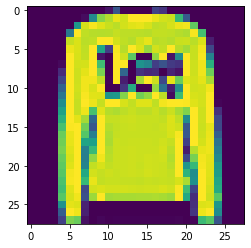

In [12]:
# Plotting x_test[i] image 
plt.imshow(x_test[1].reshape(28,28))
plt.show()

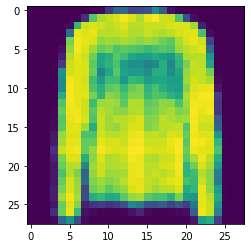

In [13]:
# Plotting decoded image of x_test[i]
plt.imshow(decoded_img[1].reshape(28,28))
plt.show()

Enter number of images to be displayed : 6


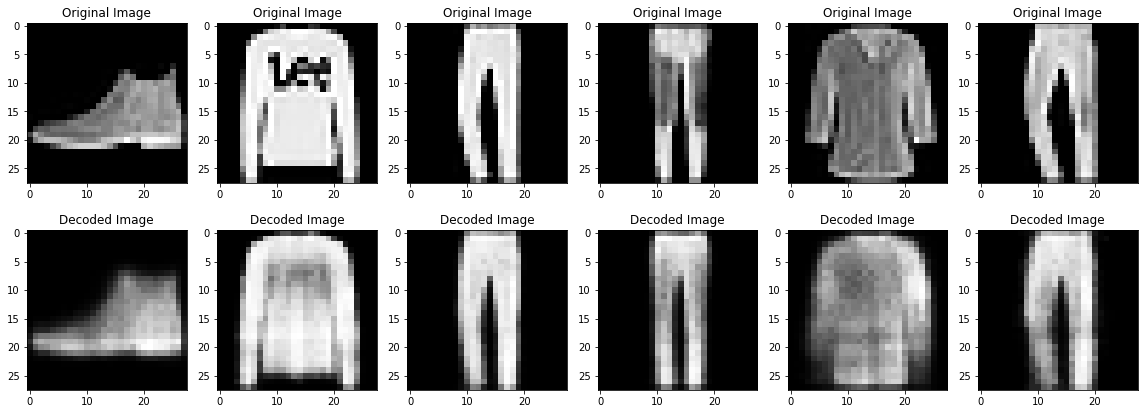

In [14]:
# Plotting some of the reconstructed images and their previous versions
num_of_images = int(input(('Enter number of images to be displayed : ' ))) #taking input form user

plot = plt.figure(figsize=(16, 6))

#looping through all the requested number of inages
for i in range(num_of_images):
    ax1 = plt.subplot(2, num_of_images, i+1) #ploting original images
    plt.imshow(x_test[i].reshape(28, 28)) #reshaping the image
    plt.title('Original Image')
    plt.gray()

    ax2 = plt.subplot(2, num_of_images, i+1+num_of_images) # ploting predict images
    plt.imshow(decoded_img[i].reshape(28, 28)) #reshaping the image
    plt.title('Decoded Image')
    plt.tight_layout()
    plt.gray()

In [15]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

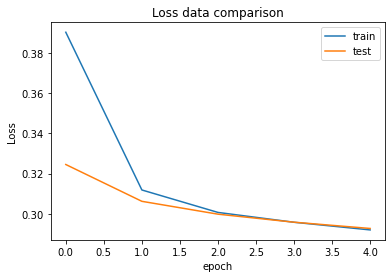

In [16]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

### Observations : 
1. Loss of the train and test data is almost same and it is around 30%

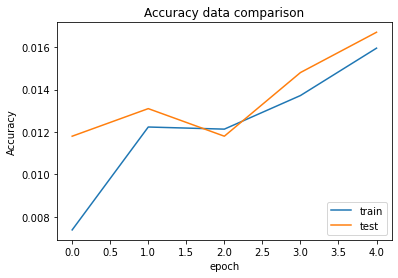

In [17]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

### Observations :
1. Accuracy of the test data is looking more and i believe this is not good model.

### Tried running the history with more epoches since the accuracy of data above shown is not correct beacuse train data accuracy should be more than test data.
### Increased epoches to 30

In [18]:
#fitting the data to autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2891 - accuracy: 0.0175 - val_loss: 0.2906 - val_accuracy: 0.0186
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2870 - accuracy: 0.0199 - val_loss: 0.2881 - val_accuracy: 0.0193
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2853 - accuracy: 0.0213 - val_loss: 0.2869 - val_accuracy: 0.0196
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2841 - accuracy: 0.0219 - val_loss: 0.2858 - val_accuracy: 0.0214
Epoch 5/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2828 - accuracy: 0.0226 - val_loss: 0.2848 - val_accuracy: 0.0201
Epoch 6/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2818 - accuracy: 0.0237 - val_loss: 0.2836 - val_accuracy: 0.0240
Epoch 7/30
235/235 [==============================] - 1s 6ms/step - loss: 0.2810 - accuracy: 0.0242 - val_loss: 0.2828 - val_accuracy: 0.0242
Epoch 

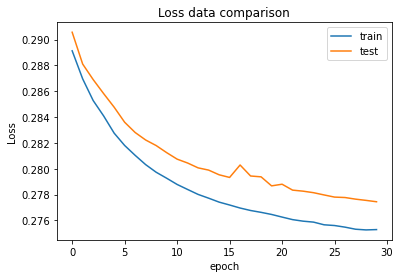

In [19]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

## Observations : 
1. Loss of the train and test data is almost same to the previous model and it is around 28%

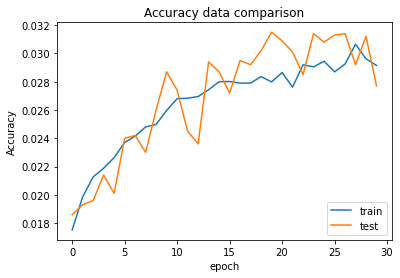

In [20]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

## Observations: 
1. Accuracy of the model is still not looking good and it ended just less than train data.